<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/ArtificialIntelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공신경망
인공신경망 : 확률적 경사 하강법을 사용하는 로지스틱 회귀와 동일

로지스틱 회귀에선 특성마다 입력이 존재하여 y값을 만들었지만 인공신경만에선 입력값마다 입력층 존재, 여기에 가중치를 곱해 더하면 각 클래스마다 최종 값이 나온다.

입력층, 출력층 존재

<br>

###텐서플로
구글이 2015년 오픈소스로 공개한 딥러닝 라이브러리<br>
텐서플로에는 저수준 API과 고수준 API가 있는데 **케라스**는 고수준 API임<br>
딥러닝 라이브러리의 특징은 GPU를 사용하여 신경망 훈련 가능함.<br>
케라스는 직접 GPU연산 수행하지 않고 대신 수행하는 라이브러리(파이토치,텐서플로,잭스)를 백엔드로 사용


| 항목           | **TensorFlow**           | **Keras**                | **PyTorch**                 |
| ------------ | ------------------------ | ------------------------ | --------------------------- |
| **계산 그래프**   | 정적 계산 그래프 (Static Graph) | 정적 그래프 (TensorFlow의 일부)  | 동적 계산 그래프 (Dynamic Graph)   |
| **사용성**      | 고수준 및 저수준 API 제공         | 고수준 API (TensorFlow 위)   | 고수준 및 저수준 API 제공            |
| **유연성**      | 유연하지만 설정이 복잡할 수 있음       | 사용하기 간편하지만 유연성이 떨어질 수 있음 | 매우 유연하며 실험적 모델에 유리          |
| **디버깅**      | 디버깅이 어려울 수 있음            | 비교적 디버깅이 쉬움              | Pythonic하고 디버깅이 쉬움          |
| **배포**       | 대규모 배포 및 서비스에 적합         | TensorFlow와 통합되어 배포 가능   | 주로 연구용으로 사용되지만, 최근 배포가 가능해짐 |
| **사용자 수준**   | 전문가, 대규모 시스템에 적합         | 초급에서 중급 사용자에게 적합         | 연구자 및 실험적 사용자에게 적합          |
| **주요 사용 분야** | 대규모 분산 학습, 서빙, 모바일 배포    | 빠른 프로토타입 제작, 모델 구축       | 연구 및 실험, 복잡한 모델 개발          |






In [26]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

(60000, 28, 28) (60000,)


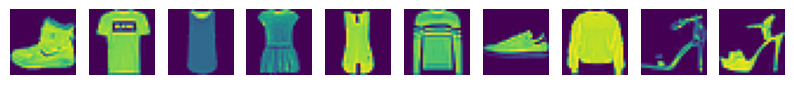

[9 0 0 3 0 2 7 2 5 5]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [27]:
print(train_input.shape, train_target.shape)

#10개 이미지 출력
fig,axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i])
  axs[i].axis('off')
plt.show()
#타깃값
#0티셔츠,1바지,2스웨터,3드레스,4코트,5샌달,6셔츠,7스니커즈,8가방,9앵클부츠
print(train_target[:10])
print()

#6000개씩 고루 분배되있음
print(np.unique(train_target, return_counts=True))

#픽셀값을 0~1로 정규화, 1차원배열로 펼침
train_scaled= train_input/255.0
train_scaled=train_scaled.reshape(-1, 28*28)

## 케라스로 인공신경망 만들기

입력과 밀집층의 뉴런이 FullyConnected되고 각각의 연결마다 가중치가 필요,
각각의 뉴런마다 절편(bias)가 필요

즉 입력층100개, 뉴런10개면 파라미터는 100*10+10=1010개임
<br><br>


입력층, 은닉층, 출력층

밀집층,(FC layer)


원-핫 인코딩

In [28]:
#케라스 사용

#현재 사용중인 백엔드 출력
print(keras.config.backend())

# 백엔드 바꾸는 방법 -> 코랩 재시작해야함
# import os
# os.environ["KERAS_BACKEND"]="torch"

#딥러닝에선 교차 검증 잘 안씀, 데이터셋 충분히 크고 쓴다면 훈련 시간이 너무 오래 걸리기 때문
train_scaled, val_scaled, train_target, val_target= train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#잘 나누어짐
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

"""
○케라스로 인공신경망 만들기
만드는 방법은 Sequential API, Functional API 두 가지 방법이 있으나 여기선 Functional이용
1. 입력층 정의
2. 은닉층 추가
3. 출력층 추가
"""
# 1. 입력층 추가, 예제 샘플이 28*28이고 1차원 배열로 나타내니 784개의 픽셀 크기가 됨
inputs = keras.layers.Input(shape=(784,))
# 2. 밀집층(dense)(완전 연결층(FC)) 추가(모든 노드끼리 연결되어 있음)
# 10 -> 뉴런 개수, activatoin -> 뉴런 출력에 적용할 함수(softmax->확률화, 이진 분류-> sigmoid)
dense = keras.layers.Dense(10, activation='softmax')
# 3. 신경망 모델 만들기, 입력층 객체와 밀집층 객체를 리스트로 묶어 전달
model = keras.Sequential([inputs, dense]) # 마지막에 소프트맥스 적용, 각 뉴런마다 절편 존재
# 4. 훈련 전 설정단계  loss->손실 함수 종류 지정, metrics -> 에포크마다 정확도 출력
# 이진 분류=binary_, 다중 분류=categorical. sparse->타깃값이 원-핫 인코딩이 아니라면 앞에 붙이기
# 원-핫 인코딩 -> 범주형 데이터를 컴퓨터가 이해할 수 있도록 고유값 크기만큼의 벡터에서 해당 위치만 1표시하고 나머지는 0으로 표시
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 5. 훈련 시작 (입력, 타깃, 반복 횟수)
model.fit(train_scaled, train_target, epochs=5)
# 6. 모델 평가
model.evaluate(val_scaled, val_target)

tensorflow
(48000, 784) (48000,)
(12000, 784) (12000,)
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7472 - loss: 0.7583
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8380 - loss: 0.4760
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8448 - loss: 0.4541
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8490 - loss: 0.4464
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8527 - loss: 0.4357
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8456 - loss: 0.4418


[0.45010673999786377, 0.8448333144187927]